# Titanic: Machine Learning from Disaster

url = https://www.kaggle.com/c/titanic

### Understanding the Question

Given certain characteristics of each passenger can we predict if they survived the sinking or not?
The titanic data set contains 10 different x values we can use to make predictions.  Our y values are binary with 1 being they survived, and 0 being that they did not survive.  

This is therefore a supervised classification problem.

### Getting Started - Load & Inspect Data

The data is available from Kaggle at https://www.kaggle.com/c/titanic/data.  The train.csv is what we will use to build our model as it contains both the features and labels.  The test.csv contains the features only and we must predict these labels to submit to the Kaggle competition.

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df.shape

(891, 12)

In [3]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Cleaning up the Data

Looks like there are some NaN values in our dataset.  Our machine learning algorithms can't do much with a NaN value, let's fill those in.  Since the 'Cabin' column is missing for over 75% of the samples I am choosing to just throw that column out.

Embarked and Age can be filled in.  For both of these columns I think using the median might be a good idea.

Before we go manipulating the raw data we need to make a copy of the data we loaded so we don't accidentally change the original dataset.

In [6]:
train = df.copy()

In [7]:
#Delete the Cabin column
del train['Cabin']
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [8]:
#Fill in the Age column with the median Age
median_age = train['Age'].median()
print median_age

28.0


In [9]:
#Replace NaN with median age
train['Age'].fillna(median_age, inplace=True)
#Verify no more NaN
train['Age'].isnull().sum()

0

In [10]:
#Fill in the missing Embarked values
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [11]:
#let's assume the missing 2 values are 'S'
train['Embarked'].fillna('S', inplace=True)
#verify no more NaN in our training data
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Continue cleaning the data

Now we are going to prepare the data for a machine learning algorithm.  This means we need to convert all features to a numerical data type.

In [12]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

We will not be using the 'Name' column or the 'Ticket' column as features.  In my opinion these shouldn't hold much predictive power, so to avoid potential overfitting I will remove these columns.  PassengerId will not be used to build a model but is needed later for our Kaggle submission.

In [13]:
del train['Name']
del train['Ticket']
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

Now we need to convert the remaining text columns to a numerical data type.  

In [14]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [15]:
#Convert 'male' to 0 and 'female' to 1
train['Sex'].replace(to_replace='male', value=0, inplace=True)
train['Sex'].replace(to_replace='female', value=1, inplace=True)
train['Sex'].value_counts()

0    577
1    314
Name: Sex, dtype: int64

In [16]:
train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [17]:
#Convert Embarked value as follows
#S=1, C=2, Q=3
train['Embarked'].replace(to_replace=['S', 'C', 'Q'], value = [1, 2, 3], inplace=True)
train['Embarked'].value_counts()

1    646
2    168
3     77
Name: Embarked, dtype: int64

In [18]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked         int64
dtype: object

### Visualize the Data

Now that all of our data is numerical and we no longer have any missing values, let's play around with it a little bit to see what we can discover.  The visualizations here can help us get an idea of what feature or features may have the most predictive power.

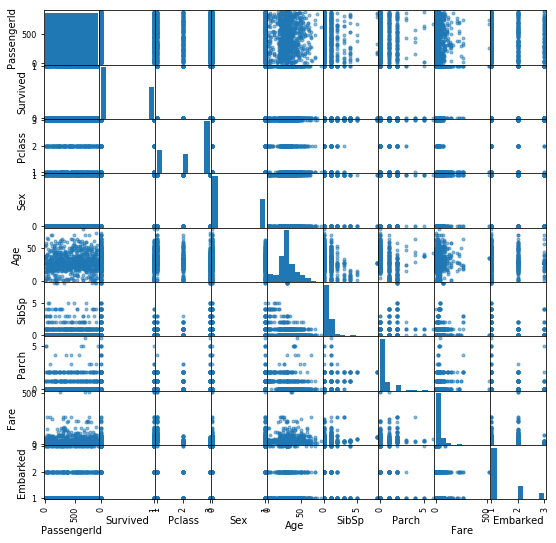

In [19]:
%matplotlib inline
from pandas.tools.plotting import scatter_matrix
scatter_matrix(train, figsize=(9,9));

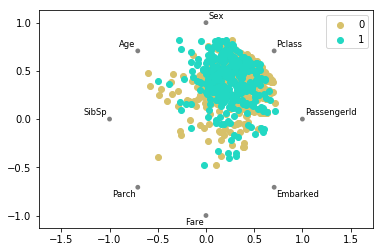

In [20]:
from pandas.tools.plotting import radviz
radviz(train, 'Survived')

### Pre-Process Data for ML Algorithms

Let's scale our data now to make it easier for the ML algorithms to work.  We will also create another copy of our data into an array X and an array Y for use by the ML algorithims. 

In [21]:
feature_cols = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = train[feature_cols].values
print X[:5, :] #Inspect 5 rows

[[  3.       0.      22.       1.       0.       7.25     1.    ]
 [  1.       1.      38.       1.       0.      71.2833   2.    ]
 [  3.       1.      26.       0.       0.       7.925    1.    ]
 [  1.       1.      35.       1.       0.      53.1      1.    ]
 [  3.       0.      35.       0.       0.       8.05     1.    ]]


In [22]:
Y = train['Survived'].values
print Y[:5] #Inspect 5 rows

[0 1 1 1 0]


In [23]:
#Normalize features using sklearn
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X) #Fit the scaler to our data
scaled_X = scaler.transform(X) #Actually scale the data
print scaled_X[:5, :]

[[ 0.82737724 -0.73769513 -0.56573646  0.43279337 -0.47367361 -0.50244517
  -0.56883712]
 [-1.56610693  1.35557354  0.66386103  0.43279337 -0.47367361  0.78684529
   1.00518113]
 [ 0.82737724  1.35557354 -0.25833709 -0.4745452  -0.47367361 -0.48885426
  -0.56883712]
 [-1.56610693  1.35557354  0.4333115   0.43279337 -0.47367361  0.42073024
  -0.56883712]
 [ 0.82737724 -0.73769513  0.4333115  -0.4745452  -0.47367361 -0.48633742
  -0.56883712]]


### Build & Test ML Models

Now we will build and test various machine learning algorithms on our training data.  We will use cross validation to improve the training of our algorithms.

#### KNN Model

In [24]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

#Initialize Model
knn_model = KNeighborsClassifier()
#Create cross validation generator
kfold = KFold(n_splits=10, random_state=5)
#Train & Test model
cross_val_results = cross_val_score(knn_model, scaled_X, Y, cv=kfold, scoring='accuracy')
print cross_val_results.mean()

0.806978776529


#### Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression

#Initialize Model
log_reg_model = LogisticRegression()
#Create cross validation generator
kfold = KFold(n_splits=10, random_state=5)
#Train & Test model
cross_val_results = cross_val_score(log_reg_model, scaled_X, Y, cv=kfold, scoring='accuracy')
print cross_val_results.mean()

0.791260923845


#### Support Vector Machine

In [26]:
from sklearn.svm import SVC

#Initialize Model
svm_model = SVC()
#Create cross validation generator
kfold = KFold(n_splits=10, random_state=5)
#Train & Test model
cross_val_results = cross_val_score(knn_model, scaled_X, Y, cv=kfold, scoring='accuracy')
print cross_val_results.mean()

0.806978776529


#### Random Forest (Ensemble Learner)

In [27]:
from sklearn.ensemble import RandomForestClassifier

#Initialize Model
rf = RandomForestClassifier()
#Create cross validation generator
kfold = KFold(n_splits=10, random_state=5)
#Train & Test model
cross_val_results = cross_val_score(rf, scaled_X, Y, cv=kfold, scoring='accuracy')
print cross_val_results.mean()

0.801398252185


#### XGBoost

In [29]:
from xgboost import XGBClassifier

#Initialize Model
xgb = XGBClassifier()
#Create cross validation generator
kfold = KFold(n_splits=10, random_state=5)
#Train & Test model
cross_val_results = cross_val_score(xgb, scaled_X, Y, cv=kfold, scoring='accuracy')
print cross_val_results.mean()

0.824968789014


### Pick a Model & Improve it

All of our learners performed pretty similar in the cross validation.  However XGB was slightly better and is the algorithm I want to use to make my submission this time to Kaggle.  So let's now work on tuning it.

It should be pointed out that all of the algorithms used above were running with the default parameters.

In [32]:
#Default XGB parameters
print xgb

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)


In [35]:
#Test n_estimators
n_estimators = [10, 20, 40, 100, 150, 200, 500, 1000] #default = 100

for n in n_estimators:
    model = XGBClassifier(n_estimators=n)
    kfold = KFold(n_splits=10, random_state=5)
    cross_val_results = cross_val_score(model, scaled_X, Y, cv=kfold, scoring='accuracy')
    print "Mean: %f N-Estimators: %d" % (cross_val_results.mean(), n)


Mean: 0.815930 N-Estimators: 10
Mean: 0.821548 N-Estimators: 20
Mean: 0.828327 N-Estimators: 40
Mean: 0.824969 N-Estimators: 100
Mean: 0.828327 N-Estimators: 150
Mean: 0.824956 N-Estimators: 200
Mean: 0.829451 N-Estimators: 500
Mean: 0.819351 N-Estimators: 1000


So it seems by increasing the number of trees in our random forest we didn't really improve our overall results by much.

In [39]:
#Test max_depth
max_depth = [1, 3, 5, 10, 20, 40, 100] #default = None

for n in max_depth:
    model = XGBClassifier(max_depth=n)
    kfold = KFold(n_splits=10, random_state=5)
    cross_val_results = cross_val_score(model, scaled_X, Y, cv=kfold, scoring='accuracy')
    print "Mean: %f N: %d" % (cross_val_results.mean(), n)

Mean: 0.803596 N: 1
Mean: 0.824969 N: 3
Mean: 0.827191 N: 5
Mean: 0.823808 N: 10
Mean: 0.812597 N: 20
Mean: 0.820449 N: 40
Mean: 0.820449 N: 100


In [42]:
#min_child_weight
weights = [0.1, 0.5, 1, 2, 4, 8, 15, 20]

for n in weights:
    model = XGBClassifier(min_child_weight=n)
    kfold = KFold(n_splits=10, random_state=5)
    cross_val_results = cross_val_score(model, scaled_X, Y, cv=kfold, scoring='accuracy')
    print "Mean: %f N: %f" % (cross_val_results.mean(), n)

Mean: 0.826080 N: 0.100000
Mean: 0.830574 N: 0.500000
Mean: 0.824969 N: 1.000000
Mean: 0.826080 N: 2.000000
Mean: 0.837316 N: 4.000000
Mean: 0.833958 N: 8.000000
Mean: 0.818202 N: 15.000000
Mean: 0.808115 N: 20.000000


In [43]:
#gamma
gammas = [0, 0.1, 0.2, 0.4, 0.8, 1.2, 1.5, 2.0]

for n in gammas:
    model = XGBClassifier(gamma=n)
    kfold = KFold(n_splits=10, random_state=5)
    cross_val_results = cross_val_score(model, scaled_X, Y, cv=kfold, scoring='accuracy')
    print "Mean: %f N: %f" % (cross_val_results.mean(), n)

Mean: 0.824969 N: 0.000000
Mean: 0.829463 N: 0.100000
Mean: 0.829451 N: 0.200000
Mean: 0.830587 N: 0.400000
Mean: 0.829451 N: 0.800000
Mean: 0.828327 N: 1.200000
Mean: 0.822709 N: 1.500000
Mean: 0.826080 N: 2.000000


In [47]:
#col sample by tree
weights = [0.2, 0.4, 0.6, 0.8, 1.0]

for n in weights:
    model = XGBClassifier(colsample_bytree=n)
    kfold = KFold(n_splits=10, random_state=5)
    cross_val_results = cross_val_score(model, scaled_X, Y, cv=kfold, scoring='accuracy')
    print "Mean: %f N: %f" % (cross_val_results.mean(), n)

Mean: 0.802547 N: 0.200000
Mean: 0.821561 N: 0.400000
Mean: 0.823833 N: 0.600000
Mean: 0.830574 N: 0.800000
Mean: 0.824969 N: 1.000000


In [48]:
#subsample
weights = [0.2, 0.4, 0.6, 0.8, 1.0]

for n in weights:
    model = XGBClassifier(subsample=n)
    kfold = KFold(n_splits=10, random_state=5)
    cross_val_results = cross_val_score(model, scaled_X, Y, cv=kfold, scoring='accuracy')
    print "Mean: %f N: %f" % (cross_val_results.mean(), n)

Mean: 0.817091 N: 0.200000
Mean: 0.827203 N: 0.400000
Mean: 0.837316 N: 0.600000
Mean: 0.832821 N: 0.800000
Mean: 0.824969 N: 1.000000


In [50]:
#learning rate
weights = [0.01, 0.02, 0.05, 0.08, 0.1, 0.12, 0.16, 0.2, 0.24, 0.28, 0.3, 0.32, 0.35, 0.5]

for n in weights:
    model = XGBClassifier(learning_rate=n)
    kfold = KFold(n_splits=10, random_state=5)
    cross_val_results = cross_val_score(model, scaled_X, Y, cv=kfold, scoring='accuracy')
    print "Mean: %f N: %f" % (cross_val_results.mean(), n)

Mean: 0.815930 N: 0.010000
Mean: 0.819301 N: 0.020000
Mean: 0.823833 N: 0.050000
Mean: 0.823845 N: 0.080000
Mean: 0.824969 N: 0.100000
Mean: 0.828315 N: 0.120000
Mean: 0.829438 N: 0.160000
Mean: 0.827203 N: 0.200000
Mean: 0.824956 N: 0.240000
Mean: 0.824956 N: 0.280000
Mean: 0.831698 N: 0.300000
Mean: 0.831685 N: 0.320000
Mean: 0.826055 N: 0.350000
Mean: 0.822709 N: 0.500000


In [52]:
#Combine optimals
model = XGBClassifier(learning_rate=0.3, subsample=0.6, colsample_bytree=0.8, min_child_weight=4, n_estimators=150)
kfold = KFold(n_splits=10, random_state=5)
cross_val_results = cross_val_score(model, scaled_X, Y, cv=kfold, scoring='accuracy')
print cross_val_results.mean()

0.830561797753


Not much better overall, but some improvement.  Let's run a gridsearch to make finding the optimal combination of parameters easier.  I will only use the parameters that seemed to have a big effect on results as shown above.

In [65]:
from sklearn.grid_search import GridSearchCV

parameters = {'learning_rate': [0.1, 0.3],
              'min_child_weight': [3, 5, 8],
              'subsample' : [0.6, 0.8],
              'max_depth' : [3, 5, 10]}
xgb = XGBClassifier()
grid_search = GridSearchCV(xgb, parameters, n_jobs=1, cv=10, scoring='accuracy')
grid_search.fit(scaled_X, Y)

GridSearchCV(cv=10, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'subsample': [0.6, 0.8], 'learning_rate': [0.1, 0.3], 'max_depth': [3, 5, 10], 'min_child_weight': [3, 5, 8]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [66]:
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 5, 'subsample': 0.8}

In [67]:
grid_search.best_score_

0.8395061728395061

#### Tune the Regularization Parameters too

In [101]:
from sklearn.grid_search import GridSearchCV

parameters = {'subsample' : [0.6, 0.8],
              'max_depth' : [3, 5, 10],
              'reg_alpha':[.05, 0.1, 0.15, 0.2]}
xgb = XGBClassifier(min_child_weight=4, learning_rate=0.3)
grid_search = GridSearchCV(xgb, parameters, n_jobs=1, cv=10, scoring='accuracy')
grid_search.fit(scaled_X, Y)

GridSearchCV(cv=10, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.3, max_delta_step=0, max_depth=3,
       min_child_weight=4, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'subsample': [0.6, 0.8], 'reg_alpha': [0.05, 0.1, 0.15, 0.2], 'max_depth': [3, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [102]:
grid_search.best_score_

0.8417508417508418

In [103]:
grid_search.best_params_

{'max_depth': 10, 'reg_alpha': 0.15, 'subsample': 0.6}

### Clean & Transform Test Features

Before we train our tuned XGB and use it to make predictions on the out of sample data provided by Kaggle, we need to perform the same transformations we did to the training data.

In [75]:
#First let's read in the test data & apply the SAME transformations we did earlier
test_df = pd.read_csv('test.csv')
test_df.isnull().sum()


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [76]:
#Fill missing values with the median
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [77]:
#Convert data to numerical data types
test_df['Embarked'].replace(to_replace=['S', 'C', 'Q'], value = [1, 2, 3], inplace=True)
test_df['Sex'].replace(to_replace='male', value=0, inplace=True)
test_df['Sex'].replace(to_replace='female', value=1, inplace=True)
test_df.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked         int64
dtype: object

In [78]:
#Remove columns not using
del test_df['Name']
del test_df['Cabin']
del test_df['Ticket']
test_df.dtypes

PassengerId      int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked         int64
dtype: object

In [79]:
#Extract our test features
feature_cols = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X_test = test_df[feature_cols].values
print X_test[:5, :] #Inspect 5 rows

[[  3.       0.      34.5      0.       0.       7.8292   3.    ]
 [  3.       1.      47.       1.       0.       7.       1.    ]
 [  2.       0.      62.       0.       0.       9.6875   3.    ]
 [  3.       0.      27.       0.       0.       8.6625   1.    ]
 [  3.       1.      22.       1.       1.      12.2875   1.    ]]


In [80]:
#Scale our test features
scaler = StandardScaler().fit(X_test) #Fit the scaler to our data
scaled_X_test = scaler.transform(X_test) #Actually scale the data
print scaled_X_test[:5, :]

[[ 0.87348191 -0.75592895  0.38623105 -0.49947002 -0.4002477  -0.49741333
   2.24316522]
 [ 0.87348191  1.32287566  1.37137004  0.61699237 -0.4002477  -0.51227801
  -0.6778412 ]
 [-0.31581919 -0.75592895  2.55353683 -0.49947002 -0.4002477  -0.46410047
   2.24316522]
 [ 0.87348191 -0.75592895 -0.20485235 -0.49947002 -0.4002477  -0.48247516
  -0.6778412 ]
 [ 0.87348191  1.32287566 -0.59890794  0.61699237  0.61989583 -0.4174915
  -0.6778412 ]]


### Make Predictions & Submit to Kaggle

Now we can train our model on our training data and then use the test features to make predictions for our submission.

In [97]:
#Initialize Model
xgb = XGBClassifier()
#Train Model
xgb.fit(scaled_X, Y)
#Get Predictions
predictions_Y = xgb.predict(scaled_X_test)
print predictions_Y.sum() #See how many we predict to survive (spot-checking results)

136


In [105]:
#Initialize Optimal Model
xgb = XGBClassifier(min_child_weight=4, learning_rate=0.3, max_depth=10, reg_alpha=0.15, subsample=0.6)
#Train Model
xgb.fit(scaled_X, Y)
#Get Predictions
predictions_Y_optimal = xgb.predict(scaled_X_test)
print predictions_Y_optimal.sum() #See how many we predict to survive (spot-checking results)

154


The Kaggle submission wants a csv with two columns, PassengerId and Survived.

In [106]:
#Add the Survived column to our test DataFrame
test_df['Survived'] = predictions_Y_optimal
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,892,3,0,34.5,0,0,7.8292,3,0
1,893,3,1,47.0,1,0,7.0000,1,0
2,894,2,0,62.0,0,0,9.6875,3,0
3,895,3,0,27.0,0,0,8.6625,1,0
4,896,3,1,22.0,1,1,12.2875,1,0


In [107]:
#Extract the data we need
output_df = test_df[['PassengerId', 'Survived']]
output_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [108]:
#Write to local csv file
output_df.to_csv("titanic_submission_xgb.csv", index=False)

### Conclusion

This default XGB scored a .76077, which ended up being much better than any of the tuned versions.

This optimal one scored only a .72249, perhaps it was 'overfit' by tuning a bit too much.
